### Step 1: Importing the dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Step 2 : Data collection and preprocessing

In [3]:
df=pd.read_csv('data.csv')

# set the max columns to none
pd.set_option('display.max_columns', None)


df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
df.drop(['id','Unnamed: 32'],axis=1,inplace = True)

In [7]:
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [8]:
df.shape

(569, 31)

In [9]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [10]:
# data is nicely balanced

In [11]:
df = df.replace({'diagnosis' : {'B' : 0 , 'M' : 1 }})

In [12]:
# 0 --> benign

# 1 --> Malingnant

In [13]:
df.head(2)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [14]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [15]:
df.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [16]:
# malignant(1) is more dangerous 
# we can also see the values related to malignant group are usually high

### Step 3 : Splitting data set into feature and target

In [17]:
X=df.drop('diagnosis',axis=1)
Y=df['diagnosis']

In [18]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [19]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [20]:
# splitting data into training and testing dataset

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=41)

In [21]:
print(X.shape,X_train.shape,X_test.shape)

(569, 30) (455, 30) (114, 30)


### Step 4: Standardization of data

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler=StandardScaler()

X_train_std=scaler.fit_transform(X_train)

X_test_std=scaler.transform(X_test)

### Step 5 :Building a neural network

In [24]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [25]:
# setting up the layers of neural network

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dense(2,activation='sigmoid')
])

In [26]:
# compiling the neural network
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [27]:
# training the neural network

history=model.fit(X_train_std,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
13/13 [==============================] - 1s 24ms/step - loss: 0.3185 - accuracy: 0.8851 - val_loss: 0.2459 - val_accuracy: 0.8913
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.2424 - accuracy: 0.9218 - val_loss: 0.1895 - val_accuracy: 0.9130
Epoch 3/10
13/13 [==============================] - 0s 4ms/step - loss: 0.1991 - accuracy: 0.9267 - val_loss: 0.1525 - val_accuracy: 0.9348
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1719 - accuracy: 0.9389 - val_loss: 0.1289 - val_accuracy: 0.9565
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.1522 - accuracy: 0.9413 - val_loss: 0.1142 - val_accuracy: 0.9565
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1387 - accuracy: 0.9462 - val_loss: 0.1019 - val_accuracy: 0.9565
Epoch 7/10
13/13 [==============================] - 0s 5ms/step - loss: 0.1266 - accuracy: 0.9584 - val_loss: 0.0928 - val_accuracy: 0.9565
Epoch 8/10
13/13 [=

### Step 6 : visualization of accuracy and loss function wrt epochs

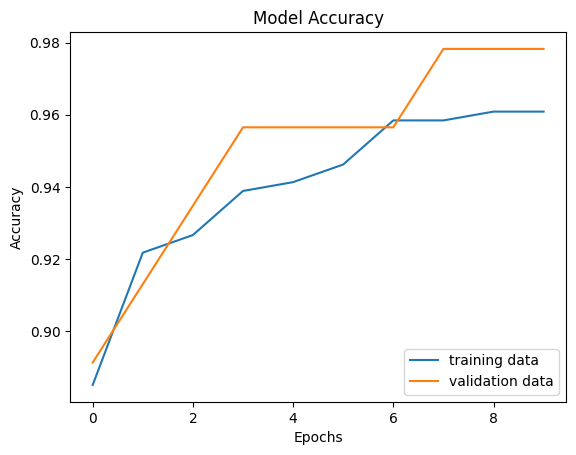

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')

plt.ylabel("Accuracy")
plt.xlabel('Epochs')

plt.legend(['training data','validation data'],loc='lower right')

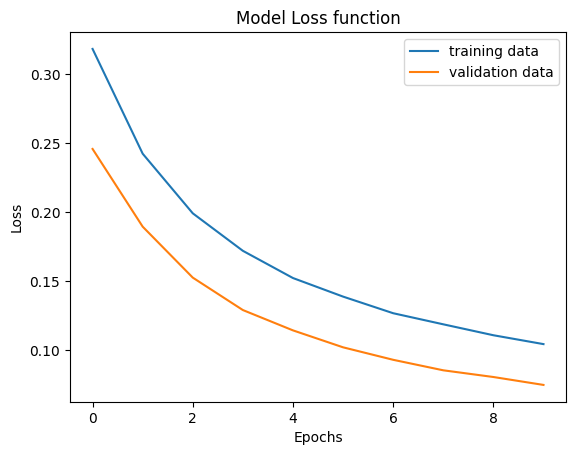

In [31]:
# visualization of loss function wrt to number of epochs

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Model Loss function')

plt.ylabel("Loss")
plt.xlabel('Epochs')

plt.legend(['training data','validation data'],loc='upper right')

### Step 7 : Evaluation of the model on the test data

In [32]:
# now we will test the data on test data with the help of same neural network

# let evaluate model on test data

loss, accuracy=model.evaluate(X_test_std,Y_test)

4/4 [==============================] - 0s 3ms/step - loss: 0.0713 - accuracy: 0.9737


In [35]:
print(X_test_std.shape)

print(X_test_std[0])

(114, 30)
[-0.43790257 -0.21350264 -0.50001024 -0.47603154 -0.8817457  -1.18711603
 -1.10569041 -1.18555196 -0.40946804 -0.61906931 -0.50372997  0.28166349
 -0.61384394 -0.45348492 -0.19271161 -0.96292085 -1.09760614 -1.47232435
  0.7620071  -0.69486645 -0.57802643 -0.45097046 -0.65313828 -0.56428422
 -1.26198798 -1.20458155 -1.29348734 -1.62194722 -0.65818251 -1.11659911]


In [33]:
Y_pred=model.predict(X_test_std)

4/4 [==============================] - 0s 5ms/step


In [36]:
print(Y_pred.shape)

print(Y_pred[0])

(114, 2)
[0.52960944 0.00111281]


In [38]:
# first value indicated the probability of result being zero and second value indicated the probability of being one

# if first value is maximum will consider it as zero or if second value is maximum we will consider output as one

In [39]:
print(X_test_std)

[[-0.43790257 -0.21350264 -0.50001024 ... -1.62194722 -0.65818251
  -1.11659911]
 [ 0.19791867 -1.06494654  0.13682124 ...  0.15746166  0.34259051
  -0.13890569]
 [ 0.16291934 -0.94862907  0.17492951 ...  0.38079026  0.41218069
   0.02033139]
 ...
 [-0.16665773 -0.09951152 -0.14983761 ...  0.46645055 -0.39142016
  -0.41784897]
 [-0.88122747 -0.51127537 -0.86330905 ... -0.30082087 -0.20253254
   1.80590246]
 [-0.06165972 -0.72297317 -0.13205375 ... -0.90625553 -0.89512049
  -0.73687991]]


In [40]:
print(Y_pred)

[[5.29609442e-01 1.11280556e-03]
 [5.13114512e-01 1.64876983e-01]
 [5.51506639e-01 6.73510849e-01]
 [6.19005799e-01 3.21049452e-01]
 [5.96866250e-01 1.84978219e-03]
 [7.87469387e-01 1.65620521e-02]
 [4.46302770e-03 9.99980688e-01]
 [4.58279960e-02 9.90999281e-01]
 [2.13662952e-01 9.65009809e-01]
 [9.12999809e-01 8.55124835e-03]
 [1.67708069e-01 9.99102592e-01]
 [1.24481045e-01 9.96154249e-01]
 [1.79776669e-01 9.89398897e-01]
 [3.60611439e-01 1.63244549e-02]
 [5.54803550e-01 1.56157032e-01]
 [9.46814418e-01 3.87712964e-04]
 [7.21887171e-01 7.55384797e-03]
 [7.35393345e-01 3.45778987e-02]
 [3.26943636e-01 3.98592353e-02]
 [5.29872537e-01 1.15216952e-02]
 [3.73583168e-01 3.69169801e-01]
 [2.99117535e-01 9.38654761e-04]
 [2.54444629e-01 1.15726791e-01]
 [6.74300969e-01 1.06410487e-02]
 [4.08104807e-01 6.30973950e-02]
 [7.91438401e-01 5.45766205e-03]
 [7.97058046e-01 1.05142528e-02]
 [8.17063987e-01 5.59433177e-03]
 [6.89133108e-01 2.06826357e-04]
 [4.29817945e-01 1.17410142e-02]
 [3.194754

In [41]:
# model.predict() will give the result in terms of probability

# we need to convert it into labelled data as zero or one

In [42]:
# use of argmax function

my_list=[3,5,7]

max_index_pos=np.argmax(my_list)

print(my_list)

print(max_index_pos)

[3, 5, 7]
2


In [43]:
Y_pred_labels=[np.argmax(i) for i in Y_pred]

In [44]:
print(Y_pred_labels)

[0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0]


### Step 8 :Building the predictive system

In [47]:
input_data=(8.888,14.64,58.79,244,0.09783,0.1531,0.08606,0.02872,0.1902,0.0898,0.5262,0.8522,3.168,25.44,0.01721,0.09368,0.05671,0.01766,0.02541,0.02193,9.733,15.67,62.56,284.4,0.1207,0.2436,0.1434,0.04786,0.2254,0.1084)

#change input data as numpy array

input_data_as_array=np.asarray(input_data)

# reshaping the numpy array as we are predicting for one data point

reshaped_array=input_data_as_array.reshape(1,-1)

# then we have to standardize data

standardized_input=scaler.transform(reshaped_array)

# now we are ready to predict

prediction=model.predict(standardized_input)

print(prediction)

prediction_label=[np.argmax(prediction)]

print(prediction_label)

if prediction_label[0]==0:
    print('Patient is Banign')
else:
    print("Patient is Malignant")

1/1 [==============================] - 0s 28ms/step
[[0.83084464 0.00196799]]
[0]
Patient is Banign
